# Python | Image Classification using Keras

For feeding the dataset folders they should be made and provided into this format only. So now, Let’s begins with the model: 
For training the model we don’t need a large high-end machine and GPU’s, we can work with CPU’s also. Firstly, in given code include the following libraries: 

In [18]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 224, 224


#### Image classification is a method to classify the images into their respective category classes using some methods like :  

    Training a small network from scratch
    Fine-tuning the top layers of the model using VGG16

Let’s discuss how to train the model from scratch and classify the data containing cars and planes.
Train Data: Train data contains the 200 images of each car and plane i.e. total there are 400 images in the training dataset 
Test Data: Test data contains 50 images of each car and plane i.e. total there are 100 images in the test dataset
To download the complete dataset, click here.

Model Description: Before starting with the model firstly prepare the dataset and its arrangement. 

In [2]:
train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16


Here, the train_data_dir is the train dataset directory. validation_data_dir is the directory for validation data. nb_train_samples is the total number of train samples. nb_validation_samples is the total number of validation samples.

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


This part is to check the data format i.e the RGB channel is coming first or last so, whatever it may be, the model will check first and then input shape will be fed accordingly. 

In [5]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#### About the following terms used above: 

    Conv2D is the layer to convolve the image into multiple images 
    Activation is the activation function. 
    MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. then, Flatten is used to flatten the dimensions of the image obtained after convolving it. 
    Dense is used to make this a fully connected model and is the hidden layer. 
    Dropout is used to avoid overfitting on the dataset. 
    Dense is the output layer contains only one neuron which decide to which category image belongs.

In [6]:
model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])


#### Now, the part of dataGenerator comes into the figure. In which we have used: 

    ImageDataGenerator that rescales the image, applies shear in some range, zooms the image and does horizontal flipping with the image. This ImageDataGenerator includes all possible orientation of the image. 
    train_datagen.flow_from_directory is the function that is used to prepare data from the train_dataset directory Target_size specifies the target size of the image. 
    test_datagen.flow_from_directory is used to prepare test data for the model and all is similar as above. 
    fit_generator is used to fit the data into the model made above, other factors used are steps_per_epochs tells us about the number of times the model will execute for the training data. 
    epochs tells us the number of times model will be trained in forward and backward pass. 
    validation_data is used to feed the validation/test data into the model. 
    validation_steps denotes the number of validation/test samples.

In [7]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

model.fit_generator(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


C:\Users\WISSAL~1\AppData\Local\Temp/ipykernel_6512/3762154218.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
25/25 [==============================] - 21s 772ms/step - loss: 0.7914 - accuracy: 0.5950 - val_loss: 0.6077 - val_accuracy: 0.6146
Epoch 2/10
25/25 [==============================] - 15s 612ms/step - loss: 0.6136 - accuracy: 0.7000 - val_loss: 0.3863 - val_accuracy: 0.8333
Epoch 3/10
25/25 [==============================] - 16s 613ms/step - loss: 0.4555 - accuracy: 0.8250 - val_loss: 0.3583 - val_accuracy: 0.8333
Epoch 4/10
25/25 [==============================] - 16s 631ms/step - loss: 0.4301 - accuracy: 0.8350 - val_loss: 0.2975 - val_accuracy: 0.8750
Epoch 5/10
25/25 [==============================] - 16s 629ms/step - loss: 0.3625 - accuracy: 0.8450 - val_loss: 0.3799 - val_accuracy: 0.8125
Epoch 6/10
25/25 [==============================] - 16s 617ms/step - loss: 0.3457 - accuracy: 0.8650 - val_loss: 0.2539 - val_accuracy: 0.8854
Epoch 7/10
25/25 [==============================] - 15s 612ms/step - loss: 0.3459 - accuracy: 0.8550 - val_loss: 0.3924 - val_accuracy: 0.8229

In [8]:
model.save_weights('model_saved.h5')

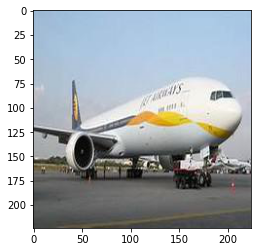

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('v_data/test/planes/5.jpg')
imgplot = plt.imshow(img)
plt.show()

#### Loading and Prediction

    Load Model with “load_model”
    Convert Images to Numpy Arrays for passing into ML Model
    Print the predicted output from the model.

In [16]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

#model = load_model('model_saved.h5')

image = load_img('v_data/test/planes/5.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])


Predicted Class (0 - Cars , 1- Planes):  0.60969406


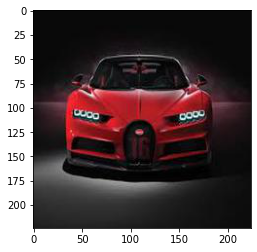

Predicted Class (0 - Cars , 1- Planes):  8.417988e-06


In [23]:
img = mpimg.imread('v_data/test/cars/14.jpg')
imgplot = plt.imshow(img)
plt.show()
image = load_img('v_data/test/cars/14.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

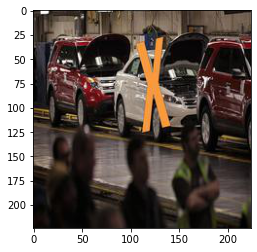

Predicted Class (0 - Cars , 1- Planes):  0.000106555264


In [22]:
img = mpimg.imread('v_data/test/cars/35.jpg')
imgplot = plt.imshow(img)
plt.show()
image = load_img('v_data/test/cars/35.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])